In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [162]:
circuit=pd.read_csv('../Project/Formula 1 dataset/circuits.csv')
races=pd.read_csv('../Project/Formula 1 dataset/races.csv')
results=pd.read_csv('../Project/Formula 1 dataset/results.csv')
drivers=pd.read_csv('../Project/Formula 1 dataset/drivers.csv')
constructors=pd.read_csv('../Project/Formula 1 dataset/constructors.csv')
lap_times=pd.read_csv('../Project/Formula 1 dataset/lap_times.csv')
status=pd.read_csv('../Project/Formula 1 dataset/status.csv')
quali=pd.read_csv('../Project/Formula 1 dataset/qualifying.csv')

In [50]:
races.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

Combining all the datasets

In [163]:
df1 = pd.merge(races,results,how='inner',on=['raceId'])
df2 = pd.merge(df1,quali,how='inner',on=['raceId','driverId','constructorId'])
df3 = pd.merge(df2,drivers,how='inner',on=['driverId'])
df4 = pd.merge(df3,constructors,how='inner',on=['constructorId'])
df4.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name_x', 'date', 'time_x',
       'url_x', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date',
       'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time',
       'resultId', 'driverId', 'constructorId', 'number_x', 'grid',
       'position_x', 'positionText', 'positionOrder', 'points', 'laps',
       'time_y', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'qualifyId', 'number_y', 'position_y',
       'q1', 'q2', 'q3', 'driverRef', 'number', 'code', 'forename', 'surname',
       'dob', 'nationality_x', 'url_y', 'constructorRef', 'name_y',
       'nationality_y', 'url'],
      dtype='object')

In [52]:
circuit.columns

Index(['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng',
       'alt', 'url'],
      dtype='object')

Dropping irrelevant columns

In [164]:
data = df4.drop(['round','time_x','url_x','resultId','driverId',
                 'constructorId','number_x','positionText','position_x',
                 'positionOrder','laps','time_y','rank',
                 'fastestLapTime','fastestLapSpeed','qualifyId','driverRef','number','code','url_y','number_y',
                 'points','constructorRef','name_x','raceId','fastestLap','q1','q2',
                 'q3'],axis=1)

In [165]:
df = pd.merge(data,circuit,how='inner',on=['circuitId'])

In [166]:
df=df.drop(['circuitRef','location','lat','lng','alt'],axis=1)

In [115]:
df.columns

Index(['year', 'circuitId', 'date', 'fp1_date', 'fp1_time', 'fp2_date',
       'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time',
       'sprint_date', 'sprint_time', 'grid', 'milliseconds', 'statusId',
       'position_y', 'forename', 'surname', 'dob', 'nationality_x', 'name_y',
       'nationality_y', 'url_x', 'name', 'country', 'url_y'],
      dtype='object')

Considering Data after 2017

In [167]:
df = df[df['year']>=2015]

In [58]:
df.head()

,year,circuitId,date,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,...,forename,surname,dob,nationality_x,name_y,nationality_y,url_x,name,country,url_y
34,2017,1,2017-03-26,\N,\N,\N,\N,\N,\N,\N,...,Nico,Hülkenberg,1987-08-19,German,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
35,2018,1,2018-03-25,\N,\N,\N,\N,\N,\N,\N,...,Nico,Hülkenberg,1987-08-19,German,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
36,2019,1,2019-03-17,\N,\N,\N,\N,\N,\N,\N,...,Nico,Hülkenberg,1987-08-19,German,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
39,2019,1,2019-03-17,\N,\N,\N,\N,\N,\N,\N,...,Daniel,Ricciardo,1989-07-01,Australian,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
40,2016,1,2016-03-20,\N,\N,\N,\N,\N,\N,\N,...,Kevin,Magnussen,1992-10-05,Danish,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...


In [168]:
df=df.drop(['circuitId'],axis=1)

In [118]:
df['name'].head()

34    Albert Park Grand Prix Circuit
35    Albert Park Grand Prix Circuit
36    Albert Park Grand Prix Circuit
39    Albert Park Grand Prix Circuit
41    Albert Park Grand Prix Circuit
Name: name, dtype: object

In [169]:
df.rename(columns={'name':'GP_name','position_y':'position','grid':'quali_pos','name_y':'constructor','nationality_x':'driver_nationality','nationality_y':'constructor_nationality'},inplace=True)
df['date'] = pd.to_datetime(df['date'])
df['dob'] = pd.to_datetime(df['dob'])

In [170]:
df['driver'] = df['forename']+' '+df['surname']
df.drop(['forename','surname'],axis=1,inplace=True)

In [137]:
df.head(2)

,year,date,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,...,position,dob,driver_nationality,constructor,constructor_nationality,url_x,GP_name,country,url_y,driver
0,2009,2009-03-29,\N,\N,\N,\N,\N,\N,\N,\N,...,1,1980-01-19,British,Brawn,British,http://en.wikipedia.org/wiki/Brawn_GP,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Jenson Button
1,2009,2009-03-29,\N,\N,\N,\N,\N,\N,\N,\N,...,2,1972-05-23,Brazilian,Brawn,British,http://en.wikipedia.org/wiki/Brawn_GP,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Rubens Barrichello


In [171]:
df.columns

Index(['year', 'date', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time',
       'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date',
       'sprint_time', 'quali_pos', 'milliseconds', 'statusId', 'position',
       'dob', 'driver_nationality', 'constructor', 'constructor_nationality',
       'url_x', 'GP_name', 'country', 'url_y', 'driver'],
      dtype='object')

In [172]:
df=df.drop(['fp1_date', 'fp1_time', 'fp2_date', 'fp2_time',
       'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date',
       'sprint_time'],axis=1)

In [140]:
df.head()

,year,date,quali_pos,milliseconds,statusId,position,dob,driver_nationality,constructor,constructor_nationality,url_x,GP_name,country,url_y,driver
0,2009,2009-03-29,1,5655784,1,1,1980-01-19,British,Brawn,British,http://en.wikipedia.org/wiki/Brawn_GP,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Jenson Button
1,2009,2009-03-29,2,5656591,1,2,1972-05-23,Brazilian,Brawn,British,http://en.wikipedia.org/wiki/Brawn_GP,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Rubens Barrichello
2,2008,2008-03-16,12,\N,4,13,1980-01-19,British,Honda,Japanese,http://en.wikipedia.org/wiki/Honda_Racing_F1,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Jenson Button
3,2007,2007-03-18,14,\N,11,14,1980-01-19,British,Honda,Japanese,http://en.wikipedia.org/wiki/Honda_Racing_F1,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Jenson Button
4,2006,2006-04-02,1,\N,11,1,1980-01-19,British,Honda,Japanese,http://en.wikipedia.org/wiki/Honda_Racing_F1,Albert Park Grand Prix Circuit,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Jenson Button


Team names have changed over the years so updating the team names accordingly.

In [173]:
df['constructor'] = df['constructor'].apply(lambda x: 'Racing Point' if x=='Force India' else x)
df['constructor'] = df['constructor'].apply(lambda x: 'Racing Point' if x=='Aston Martin' else x)
df['constructor'] = df['constructor'].apply(lambda x: 'Alfa Romeo' if x=='Sauber' else x)
df['constructor'] = df['constructor'].apply(lambda x: 'Renault' if x=='Lotus F1' else x)
df['constructor'] = df['constructor'].apply(lambda x: 'Alpine F1 Team' if x=='Renault' else x)
df['constructor'] = df['constructor'].apply(lambda x: 'AlphaTauri' if x=='Toro Rosso' else x)

Changing the country name to short forms and find the home country for drivers ans constructors.

In [174]:
df['driver_nationality']=df['driver_nationality'].apply(lambda x: x if (x=="Australia" or x=="Austrian") else str(x)[:3])
df['constructor_nationality']=df['constructor_nationality'].apply(lambda x: x if (x=="Australia" or x=="Austrian") else str(x)[:3])

In [175]:
df['country'] = df['country'].apply(lambda x: 'Bri' if x=='UK' else x)
df['country'] = df['country'].apply(lambda x: 'Ame' if x=='USA' else x)
df['country'] = df['country'].apply(lambda x: 'Fre' if x=='Fra' else x)
df['country'] = df['country'].apply(lambda x: x if (x=="Australia" or x=="Austria") else str(x)[:3])
df['constructor_nationality']=df['constructor_nationality'].apply(lambda x: "Austria" if x=="Austrian" else x)

Checking if it is home race for constructor or driver as it plays a crucial role

In [176]:
df['driver_home'] = df['driver_nationality'] == df['country']
df['constructor_home'] = df['constructor_nationality'] == df['country']
df['driver_home'] = df['driver_home'].apply(lambda x: int(x))
df['constructor_home'] = df['constructor_home'].apply(lambda x: int(x))

Calculating Age of driver at the GP 

In [177]:
df['age_at_gp_in_days'] = abs(df['dob']-df['date'])
df['age_at_gp_in_days'] = df['age_at_gp_in_days'].apply(lambda x: str(x).split(' ')[0])
df=df.drop(['dob','date'],axis=1)

Checking Reasons for DNF

In [178]:
arr=[3,4,20,29,31,41,68,73,81,97,82,104,107,130,137] 
for val in arr:
    print(status[status['statusId']==val])

   statusId    status
2         3  Accident
   statusId     status
3         4  Collision
    statusId    status
19        20  Spun off
    statusId    status
28        29  Puncture
    statusId   status
30        31  Retired
    statusId       status
40        41  Broken wing
    statusId    status
67        68  Physical
    statusId   status
72        73  Injured
    statusId           status
80        81  Did not qualify
    statusId              status
96        97  Did not prequalify
    statusId  status
81        82  Injury
     statusId          status
103       104  Fatal accident
     statusId      status
106       107  Eye injury
     statusId            status
127       130  Collision damage
     statusId  status
134       137  Damage


In [179]:
#These are the reason for driver dnfing (crashed,injured,puncture ie anything thats drivers fault)
df['driver_dnf'] = df['statusId'].apply(lambda x: 1 if x in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137] else 0)
#Engine failure etc ie constructor issues
df['constructor_dnf'] = df['statusId'].apply(lambda x: 1 if x not in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137,1] else 0)

Creating a drivers confidence metric to see how reliable a driver is based on the number of DNFs

In [180]:
dnf_by_driver = df.groupby('driver').sum()['driver_dnf']
driver_race_entered = df.groupby('driver').count()['driver_dnf']
driver_dnf_ratio = (dnf_by_driver/driver_race_entered)
driver_confidence = 1-driver_dnf_ratio
dc_dict = dict(zip(driver_confidence.index,driver_confidence))

Constructor reliability created based on the number of times constructor has dnf due to engine failure etc

In [181]:
dnf_by_constructor = df.groupby('constructor').sum()['constructor_dnf']
constructor_race_entered = df.groupby('constructor').count()['constructor_dnf']
constructor_dnf_ratio = (dnf_by_constructor/constructor_race_entered)
constructor_relaiblity = 1-constructor_dnf_ratio
cr_dict = dict(zip(constructor_relaiblity.index,constructor_relaiblity))

In [182]:
df['driver_confidence'] = df['driver'].apply(lambda x:dc_dict[x])
df['constructor_relaiblity'] = df['constructor'].apply(lambda x:cr_dict[x])

In [183]:
active_constructors = ['Alpine F1 Team', 'Williams', 'McLaren', 'Ferrari', 'Mercedes',
                       'AlphaTauri', 'Racing Point', 'Alfa Romeo', 'Red Bull',
                       'Haas F1 Team']
active_drivers = ['Daniel Ricciardo', 'Kevin Magnussen', 'Carlos Sainz',
                  'Valtteri Bottas', 'Lance Stroll', 'George Russell',
                  'Lando Norris', 'Oscar Piastri', 'Yuki Tsunoda',
                  'Charles Leclerc', 'Lewis Hamilton', 'Nico Hulkenberg',
                  'Max Verstappen', 'Pierre Gasly', 'Alexander Albon',
                  'Sergio Pérez', 'Esteban Ocon', 'Zhou Guanyu',
                  'Logan Sargeant','Fernando Alonso']
df['active_driver'] = df['driver'].apply(lambda x: int(x in active_drivers))
df['active_constructor'] = df['constructor'].apply(lambda x: int(x in active_constructors))

In [184]:
df_final = df[['GP_name','quali_pos','constructor','driver','position','driver_confidence','constructor_relaiblity','active_driver','active_constructor','age_at_gp_in_days']]
df_final = df_final[(df_final['active_driver']==1)&(df_final['active_constructor']==1)]

In [76]:
df_final.head()

,GP_name,quali_pos,constructor,driver,position,driver_confidence,constructor_relaiblity,active_driver,active_constructor,age_at_gp_in_days
39,Albert Park Grand Prix Circuit,12,Alpine F1 Team,Daniel Ricciardo,12,0.957576,0.527378,1,1,10851
40,Albert Park Grand Prix Circuit,14,Alpine F1 Team,Kevin Magnussen,15,0.910448,0.527378,1,1,8567
41,Albert Park Grand Prix Circuit,9,Alpine F1 Team,Carlos Sainz,9,0.902299,0.527378,1,1,8606
92,Albert Park Grand Prix Circuit,0,Williams,Valtteri Bottas,6,0.948571,0.425714,1,1,9330
93,Albert Park Grand Prix Circuit,16,Williams,Valtteri Bottas,11,0.948571,0.425714,1,1,9701


In [185]:
df_final.to_csv('pointsornot.csv')

# Predicting if podium points or no points

In [53]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import joblib
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score

In [54]:
df=pd.read_csv('pointsornot.csv',index_col=0)

In [29]:
df.head()

,GP_name,quali_pos,constructor,driver,position,driver_confidence,constructor_relaiblity,active_driver,active_constructor,age_at_gp_in_days
39,Albert Park Grand Prix Circuit,12,Alpine F1 Team,Daniel Ricciardo,12,0.957576,0.527378,1,1,10851
40,Albert Park Grand Prix Circuit,14,Alpine F1 Team,Kevin Magnussen,15,0.910448,0.527378,1,1,8567
41,Albert Park Grand Prix Circuit,9,Alpine F1 Team,Carlos Sainz,9,0.902299,0.527378,1,1,8606
92,Albert Park Grand Prix Circuit,0,Williams,Valtteri Bottas,6,0.948571,0.425714,1,1,9330
93,Albert Park Grand Prix Circuit,16,Williams,Valtteri Bottas,11,0.948571,0.425714,1,1,9701


In [30]:
df.head()

,GP_name,quali_pos,constructor,driver,position,driver_confidence,constructor_relaiblity,active_driver,active_constructor,age_at_gp_in_days
39,Albert Park Grand Prix Circuit,12,Alpine F1 Team,Daniel Ricciardo,12,0.957576,0.527378,1,1,10851
40,Albert Park Grand Prix Circuit,14,Alpine F1 Team,Kevin Magnussen,15,0.910448,0.527378,1,1,8567
41,Albert Park Grand Prix Circuit,9,Alpine F1 Team,Carlos Sainz,9,0.902299,0.527378,1,1,8606
92,Albert Park Grand Prix Circuit,0,Williams,Valtteri Bottas,6,0.948571,0.425714,1,1,9330
93,Albert Park Grand Prix Circuit,16,Williams,Valtteri Bottas,11,0.948571,0.425714,1,1,9701


In [211]:
driver_conf_dict = {}
drivers=df['driver'].unique()
for driver in drivers:
    d_conf_vals=df[df['driver']==driver]['driver_confidence'].tolist()
    d_conf=d_conf_vals[0]
    driver_conf_dict[driver] = d_conf
print(driver_conf_dict)

{'Daniel Ricciardo': 0.9575757575757576, 'Kevin Magnussen': 0.9104477611940298, 'Carlos Sainz': 0.9022988505747126, 'Valtteri Bottas': 0.9485714285714286, 'Lance Stroll': 0.8955223880597015, 'Alexander Albon': 0.9285714285714286, 'George Russell': 0.9361702127659576, 'Logan Sargeant': 0.8333333333333334, 'Fernando Alonso': 0.9323308270676692, 'Lando Norris': 0.9574468085106383, 'Oscar Piastri': 0.9166666666666666, 'Charles Leclerc': 0.8956521739130435, 'Esteban Ocon': 0.9426229508196722, 'Pierre Gasly': 0.9159663865546218, 'Lewis Hamilton': 0.9827586206896552, 'Max Verstappen': 0.9142857142857144, 'Sergio Pérez': 0.976878612716763, 'Yuki Tsunoda': 0.9285714285714286}


In [55]:
def position_index(x):
    if x<4:
        return 1  #podium
    elif x>10:
        return 3   # not in points
    else :
        return 2   # in points

In [8]:
df.dtypes

GP_name                    object
quali_pos                   int64
constructor                object
driver                     object
position                    int64
driver_confidence         float64
constructor_relaiblity    float64
active_driver               int64
active_constructor          int64
age_at_gp_in_days           int64
dtype: object

In [56]:
le = LabelEncoder()
df['GP_name'] = le.fit_transform(df['GP_name'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
df['constructor'] = le.fit_transform(df['constructor'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
df['driver'] = le.fit_transform(df['driver'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
df['position']=df['position'].apply(lambda x:position_index(x))
df=df.drop(['active_driver','active_constructor'],axis=1)

{'Albert Park Grand Prix Circuit': 0, 'Autodromo Enzo e Dino Ferrari': 1, 'Autodromo Internazionale del Mugello': 2, 'Autodromo Nazionale di Monza': 3, 'Autódromo Hermanos Rodríguez': 4, 'Autódromo Internacional do Algarve': 5, 'Autódromo José Carlos Pace': 6, 'Bahrain International Circuit': 7, 'Baku City Circuit': 8, 'Circuit Gilles Villeneuve': 9, 'Circuit Park Zandvoort': 10, 'Circuit Paul Ricard': 11, 'Circuit de Barcelona-Catalunya': 12, 'Circuit de Monaco': 13, 'Circuit de Spa-Francorchamps': 14, 'Circuit of the Americas': 15, 'Hockenheimring': 16, 'Hungaroring': 17, 'Istanbul Park': 18, 'Jeddah Corniche Circuit': 19, 'Losail International Circuit': 20, 'Marina Bay Street Circuit': 21, 'Miami International Autodrome': 22, 'Nürburgring': 23, 'Red Bull Ring': 24, 'Sepang International Circuit': 25, 'Shanghai International Circuit': 26, 'Silverstone Circuit': 27, 'Sochi Autodrom': 28, 'Suzuka Circuit': 29, 'Yas Marina Circuit': 30}
{'Alfa Romeo': 0, 'AlphaTauri': 1, 'Alpine F1 Team

In [41]:
X=df.drop('position',axis=1)
y=df['position']

In [42]:
y.unique()

array([3, 2, 1], dtype=int64)

# Logistic Regression

In [50]:
lr=LogisticRegression()

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
cv = StratifiedKFold(n_splits=10,random_state=1, shuffle = True)
result = cross_val_score(lr,X,y,cv=cv,scoring='accuracy')

In [67]:
print("Accuracy",result.mean())

Accuracy 0.8374833909115068


In [51]:
lr.fit(X_train,y_train)

LogisticRegression()

In [52]:
joblib.dump(lr, 'final_lr.joblib')

['final_lr.joblib']

# Random Forrest

In [105]:
rf=RandomForestClassifier()

In [48]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [107]:
rf.fit(X_train,y_train)
pred=rf.predict(X_test)

In [84]:
feat=rf.feature_importances_
cols=df.columns
print(cols)
print(feat)

Index(['GP_name', 'quali_pos', 'constructor', 'driver', 'position',
       'driver_confidence', 'constructor_relaiblity', 'age_at_gp_in_days'],
      dtype='object')
[0.06055026 0.65216916 0.0264278  0.03383053 0.03545923 0.08904215
 0.10252087]


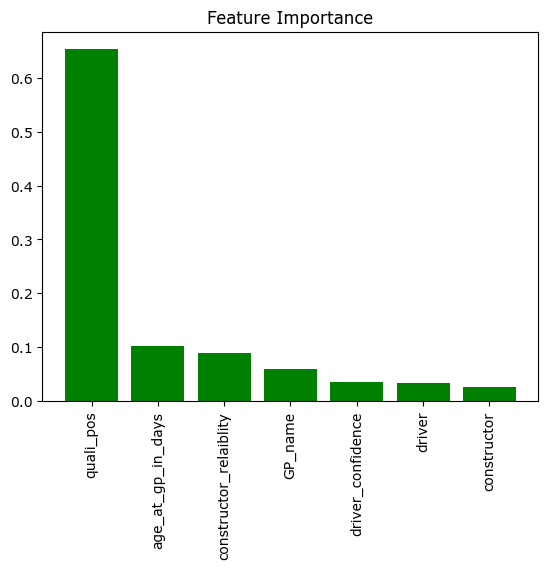

In [94]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices],color='green')
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()

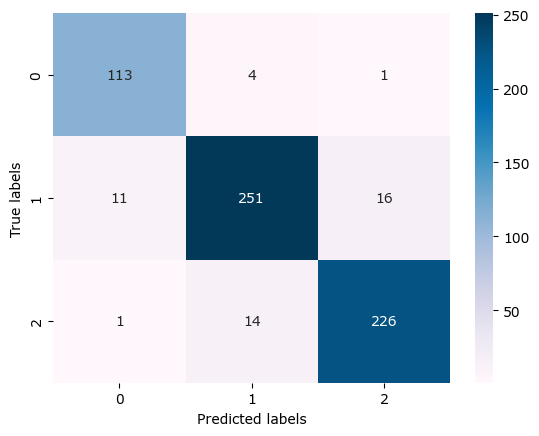

In [116]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='PuBu',fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [201]:
pred=rf.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,accuracy_score

In [203]:
cv = StratifiedKFold(n_splits=10,random_state=1, shuffle = True)
result = cross_val_score(rf,X,y,cv=cv,scoring='accuracy')

In [204]:
print(result.mean())

0.9265213925059793


In [205]:
joblib.dump(rf, 'final_rf.joblib')

['final_rf.joblib']

# Decision Tree

In [97]:
dt=DecisionTreeClassifier()

In [98]:
cv = StratifiedKFold(n_splits=10,random_state=1, shuffle = True)
result = cross_val_score(dt,X,y,cv=cv,scoring='accuracy')

In [99]:
print(result.mean())

0.8893281070068207


# GaussianNb

In [100]:
gnb=GaussianNB()

In [101]:
cv = StratifiedKFold(n_splits=10,random_state=1, shuffle = True)
result = cross_val_score(gnb,X,y,cv=cv,scoring='accuracy')

In [102]:
print(result.mean())

0.8276330941624591
